# PC Lab 8: Unsupervised Learning
---

_Unsupervised learning_ is a different branch in machine learning where a response variable $y$ is missing. Unsupervised learning techniques are most often used for exploratory purposes or as a preprocessing step in a supervised context. Unsupervised learning is more prone to subjectivity because results are harder (or even impossible) to validate. This is why one should be careful with the interpretation of results after unsupervised learning. Those interested can have a look at the paper ["Clustering: Science or Art"](http://proceedings.mlr.press/v27/luxburg12a/luxburg12a.pdf), which summarizes a couple of critics and tries to give some pointers considering the evaluation of clustering algorithms. 

In this PC-lab we will have a look at two frequently applied techniques in the context of unsupervised learning, namely principal component analysis and k-means clustering. We will end with a general scheme, in which both techniques are used.

![unsupervised](https://analystprep.com/study-notes/wp-content/uploads/2021/03/Img_12.jpg)

## 1. Principal components analysis for dimensionality reduction

![gaussianscatterpca](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f5/GaussianScatterPCA.svg/800px-GaussianScatterPCA.svg.png)

A popular area of unsupervised learning is the area of _Dimensionality Reduction_, in which one tries to reduce the number of variables for visualization purposes or as a preprocessing step for clustering or classification/regression techniques. An established technique which you will find back in most statistics courses is _Principal Components Analysis_ (PCA).

Assume a _normalized_ $n\times p$ data matrix $\mathbf{X}$. 
    
#### **Goal:** find the direction in $\mathbf{X}$ with the largest variance (i.e., the most information). 

In other words, we need to find a linear combination of the inputs:

$$ z_{i1} = \phi_{11}x_{i1}+\phi_{21}x_{i2}+\ldots+\phi_{p1}x_{ip},$$

, where $\mathbf{\phi}$ is also called the loadings in PCA nomenclature, for which the variance is maximized:

$$\text{maximize}_{\phi_{11},\ldots,\phi_{p1}}\Big\{\frac{1}{n}\sum_{i=1}^{n}\Big(\sum_{j=1}^{p}\phi_{j1}x_{ij}\Big)^{2}\Big\}\quad \text{subject to} \quad \sum_{j=1}^{p}\phi_{j1}^{2}=1.$$

Those interested in a non-formal explanation of PCA, check out this intuitive ['dining table-tale'](https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues) about PCA.

<div class="alert alert-success">

<b>EXERCISE 1.1</b>: 
**a) Have a look at the [Iris](https://en.wikipedia.org/wiki/Iris_flower_data_set) dataset. Reduce the dataset using PCA and visualize its first two components using a scatterplot. Don't forget to preprocess your data. Do you see distinctive groups?
b) How much variance is captured in the first three components?**
</div>

In [1]:
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import load_iris, load_digits
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import scale
from sklearn.utils import resample

import matplotlib.pyplot as plt
import pandas as pd

from IPython.display import display, HTML
from IPython.display import Image

plt.style.use('seaborn-white')
%matplotlib inline

In [2]:
#Preprocessing:
iris = load_iris()
X_train = iris.data
labels = iris.target

Text(0, 0.5, 'PC2 (5.0%)')

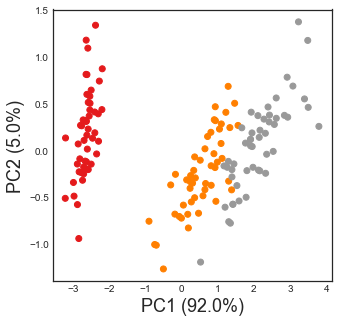

In [3]:
##1a): 
pca = PCA()
pca.fit(X_train)
X_transformed = pca.transform(X_train)
var = pca.explained_variance_ratio_
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.scatter(X_transformed[:,0],X_transformed[:,1], c=labels, cmap=plt.cm.Set1);
ax.set_xlabel(r'PC1 (' + str(np.round(var[0],2)*100) + '%)', size=18)
ax.set_ylabel(r'PC2 (' + str(np.round(var[1],2)*100) + '%)', size=18)

In [4]:
##1b): 
expl_var_comp012 = var[0] + var[1] + var[2]
print('Explained variance first three components: ' + str(expl_var_comp012))

Explained variance first three components: 0.9947878161267247


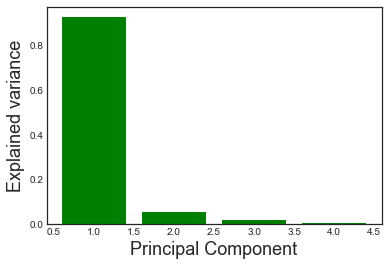

In [5]:
##1b): 
fig, ax = plt.subplots()
ax.bar(np.arange(1,var.shape[0]+1),var,color='g');
ax.set_xlabel('Principal Component', size=18)
ax.set_ylabel('Explained variance', size=18)
plt.show()

## 2. K-means clustering

K-means clustering aims to partition the data in K clusters, so that the within-cluster variation is minimized:

$$ \text{minimize}_{C_{1},\ldots,C_{K}} \Big\{ \sum_{k=1}^{K}W(C_{k})\Big\},$$

where the most popular choice for $W(C_{k})$ is the Euclidean distance:

$$W(C_{k})=\frac{1}{|C_{k}|}\sum_{i,i'\in C_{k}}\sum_{j=1}^{p}(x_{ij}-x_{i'j})^{2}.$$

K-means clustering uses the following three steps, for which step two and three are repeated until convergence is reached: 

1) The first step chooses the initial centroids; most easy way of doing this is by choosing K samples at random from the dataset. 

2) In the second step each element of the dataset is assigned to its nearest centroid. 

3) New centroids are chosen by taking the mean of all clustered samples according to the previous centroid. 

<div class="alert alert-success">

<b>EXERCISE 2.1</b>: 
**Cluster the Iris dataset by means of 2-means and 3-means clustering. Compare the clustering results by visualizing the data in the space induced by the first two principal components.**
</b>
</div>

No handles with labels found to put in legend.


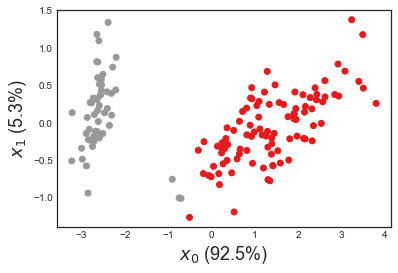

In [6]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)

fig, ax = plt.subplots()
ax.scatter(X_transformed[:,0],X_transformed[:,1], c=kmeans.labels_, cmap=plt.cm.Set1);
ax.set_xlabel(r'$x_0$ (' + str(np.round(var[0],3)*100) + '%)', size=18)
ax.set_ylabel(r'$x_1$ (' + str(np.round(var[1],3)*100) + '%)', size=18)
plt.legend()
plt.show()

No handles with labels found to put in legend.


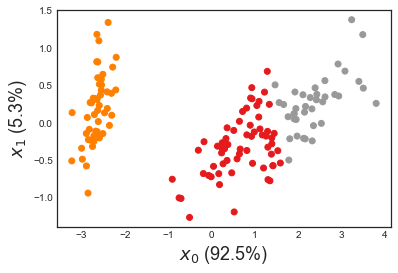

In [7]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)

fig, ax = plt.subplots()
ax.scatter(X_transformed[:,0],X_transformed[:,1], c=kmeans.labels_, cmap=plt.cm.Set1);
ax.set_xlabel(r'$x_0$ (' + str(np.round(var[0],3)*100) + '%)', size=18)
ax.set_ylabel(r'$x_1$ (' + str(np.round(var[1],3)*100) + '%)', size=18)
plt.legend()
plt.show()

## 3. Combining unsupervised techniques

Often you will find that a number of unsupervised techniques are combined when exploratory analyses are conducted. This is typically the case when your number of variables is high, where you might suffer from the [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality). In these cases, the approaches laid out above can be combined using the following scheme, which can be tweaked in function of your research question:  

1) Compute the principal components using PCA; 

2) Select a reduced number of components in function of the explained variance; 

3) Search for a number of K meaningful clusters; 

4) Cluster your data using these final settings; 

We will use this approach and analyze a more challenging dataset, called the [`digits`-dataset](http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html). This dataset consists of handwritten images of the numbers 0-9, which has been proprocessed into feature vectors of length 64. 

<div class="alert alert-success">

<b>EXERCISE 3</b>: 
**Apply the approach illustrated above to the digits dataset. Store and compare the components which explain 50% and 90% of the variance. Choose an 'optimal' number of clusters. What do you think of the result?**
</div>

In [8]:
digits = load_digits()
X = scale(digits.data)
y = digits.target

In [9]:
def return_noc_pca(var, threshold):
    sumvar = 0.
    i = 0
    while sumvar < threshold: 
        sumvar+=var[i]
        i+=1
    return i    

In [10]:
pca.fit(X)
X_transformed = pca.transform(X)
var = pca.explained_variance_ratio_
print(var)
noc_50 = return_noc_pca(var,0.5)
noc_90 =return_noc_pca(var,0.9)

[1.20339161e-01 9.56105440e-02 8.44441489e-02 6.49840791e-02
 4.86015488e-02 4.21411987e-02 3.94208280e-02 3.38938092e-02
 2.99822101e-02 2.93200255e-02 2.78180546e-02 2.57705509e-02
 2.27530332e-02 2.22717974e-02 2.16522943e-02 1.91416661e-02
 1.77554709e-02 1.63806927e-02 1.59646017e-02 1.48919119e-02
 1.34796957e-02 1.27193137e-02 1.16583735e-02 1.05764660e-02
 9.75315947e-03 9.44558990e-03 8.63013827e-03 8.36642854e-03
 7.97693248e-03 7.46471371e-03 7.25582151e-03 6.91911245e-03
 6.53908536e-03 6.40792574e-03 5.91384112e-03 5.71162405e-03
 5.23636803e-03 4.81807586e-03 4.53719260e-03 4.23162753e-03
 4.06053070e-03 3.97084808e-03 3.56493303e-03 3.40787181e-03
 3.27835335e-03 3.11032007e-03 2.88575294e-03 2.76489264e-03
 2.59174941e-03 2.34483006e-03 2.18256858e-03 2.03597635e-03
 1.95512426e-03 1.83318499e-03 1.67946387e-03 1.61236062e-03
 1.47762694e-03 1.35118411e-03 1.25100742e-03 1.03695730e-03
 8.25350945e-04 3.23475858e-33 6.39352227e-34 6.29595280e-34]


No handles with labels found to put in legend.


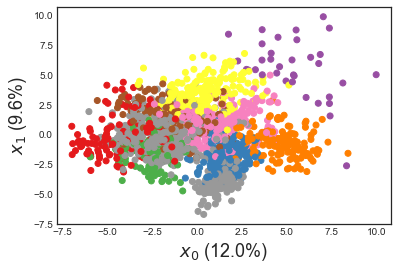

In [11]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(X_transformed[:,0:noc_50])

fig, ax = plt.subplots()
ax.scatter(X_transformed[:,0],X_transformed[:,1], c=kmeans.labels_, cmap=plt.cm.Set1);
ax.set_xlabel(r'$x_0$ (' + str(np.round(var[0],3)*100) + '%)', size=18)
ax.set_ylabel(r'$x_1$ (' + str(np.round(var[1],3)*100) + '%)', size=18)
plt.legend()
plt.show()

No handles with labels found to put in legend.


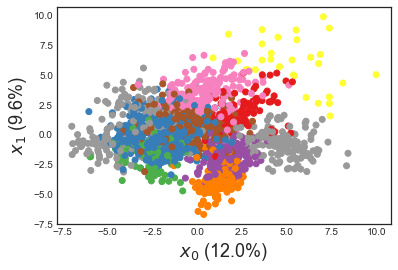

In [12]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(X_transformed[:,0:noc_90])

fig, ax = plt.subplots()
ax.scatter(X_transformed[:,0],X_transformed[:,1], c=kmeans.labels_, cmap=plt.cm.Set1);
ax.set_xlabel(r'$x_0$ (' + str(np.round(var[0],3)*100) + '%)', size=18)
ax.set_ylabel(r'$x_1$ (' + str(np.round(var[1],3)*100) + '%)', size=18)
plt.legend()
plt.show()